# 3. Plotting for Exploratory data analysis (EDA)

In [2]:
import pandas as pd
# !pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.8 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.8 kB 435.7 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.8 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 1.1 MB/s eta 0:00:00


In [3]:
# Read the data
data = pd.read_csv('MR_Actual_Predicted_Error.csv')
#data=data1.iloc[350:438,:]
data.head()

,Actual,Predicted,Error
0,22.93,22.93,0.0
1,15.46,15.46,0.0
2,12.61,12.61,0.0
3,12.84,12.84,0.0
4,15.38,15.38,0.0


In [4]:
data.describe()

,Actual,Predicted,Error
count,438.000000,438.000000,438.000000
mean,45.480890,46.849562,-1.368671
std,29.281797,29.650906,4.354028
min,11.350000,11.590000,-27.186031
25%,19.912500,21.197198,-2.861423
50%,34.365000,36.014707,-1.113634
75%,65.125000,67.155633,0.496680
max,133.880000,138.621763,13.485130


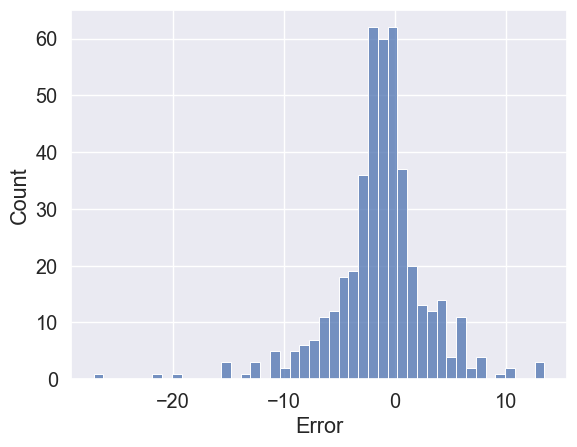

In [5]:
sns.histplot(x='Error', data=data);

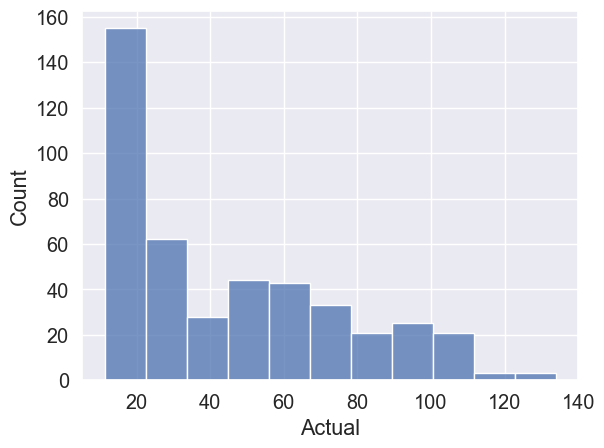

In [6]:
sns.histplot(x='Actual', data=data);

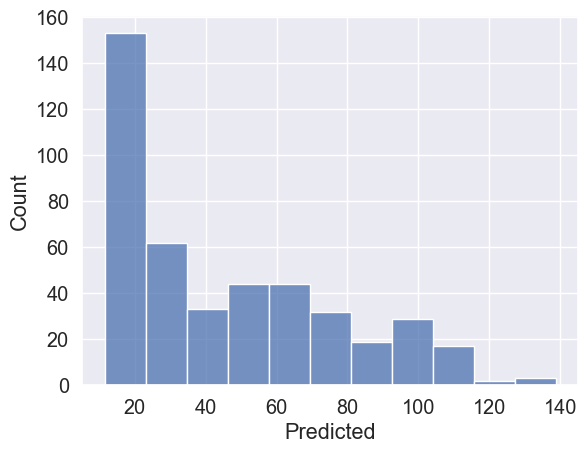

In [7]:
sns.histplot(x='Predicted', data=data);

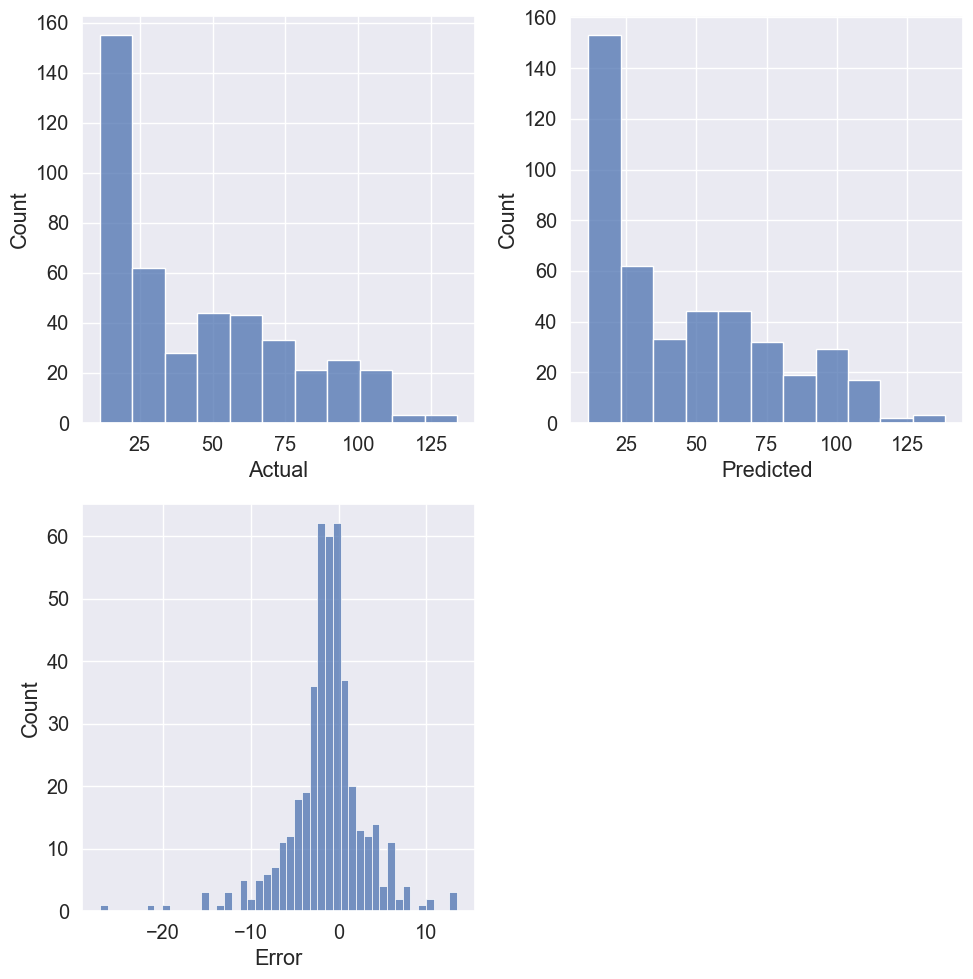

In [14]:
cols = 2
rows = 2
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<Axes: xlabel='Error', ylabel='Count'>

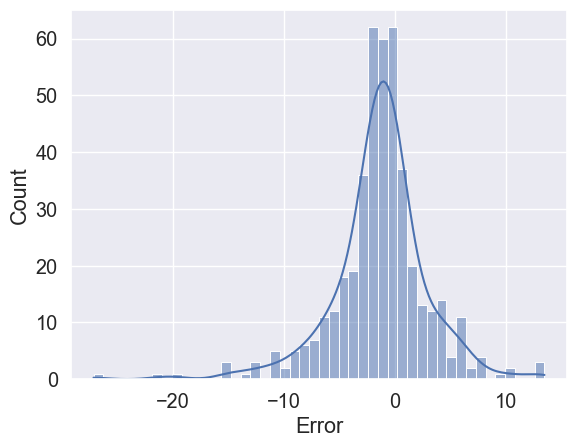

In [15]:
#KDE plot — sns.kdeplot()
sns.histplot(x='Error', data=data, kde=True)

<Axes: xlabel='Error', ylabel='Count'>

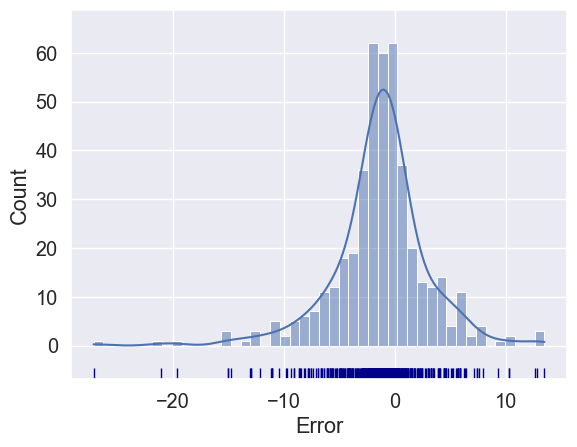

In [16]:
#4. Rug plot — sns.rugplot()
sns.rugplot(x='Error', data=data, height=.03, color='darkblue')
sns.histplot(x='Error', data=data, kde=True)

<Axes: ylabel='Density'>

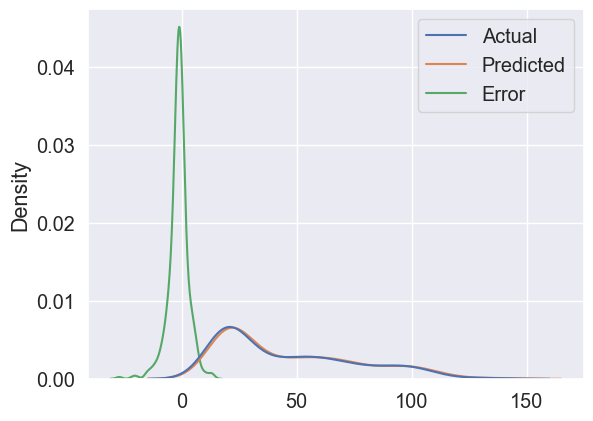

In [17]:
sns.kdeplot(data=data)

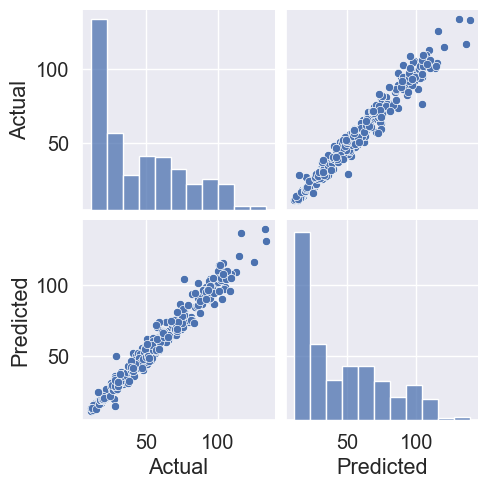

In [18]:
sns.pairplot(data.iloc[:,0:2])

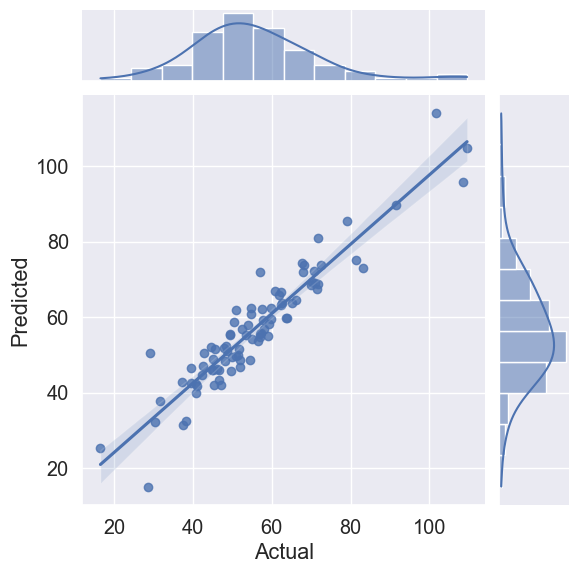

In [19]:
# Regression Plots on Test Set
sns.jointplot(x="Actual",y="Predicted",data=data.iloc[350:437,0:2],kind="reg")
plt.savefig('Joint_plot.png')

In [20]:
p=np.round(data.iloc[:,0])
p.unique()


array([ 23.,  15.,  13.,  12.,  16.,  19.,  18.,  20.,  21.,  17.,  14.,
        22.,  27.,  34.,  36.,  32.,  25.,  24.,  11.,  26.,  29.,  30.,
        31.,  33.,  28.,  35.,  37.,  40.,  38.,  41.,  45.,  46.,  53.,
        48.,  43.,  47.,  54.,  50.,  56.,  59.,  65.,  66.,  62.,  58.,
        63.,  69.,  71.,  74.,  73.,  64.,  55.,  60.,  67.,  72.,  80.,
        86.,  95.,  92.,  93., 105., 113., 125., 134., 133., 117., 104.,
        77.,  57.,  42.,  39.,  70.,  76.,  78.,  81.,  84.,  75.,  82.,
        89., 103., 110., 101.,  96.,  97.,  99., 100., 102., 106.,  88.,
        94.,  87., 107.,  98.,  51.,  49.,  52.,  68.,  61.,  79.,  83.,
       108., 115.])

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
    --------------------------------------- 0.0/2.5 MB 653.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.5 MB 1.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.3/2.5 MB 1.9 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.5 MB 2.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.5 MB 2.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.5 MB 2.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.6/2.5 MB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.5 MB 2.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.5 MB 2.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.8/2.5 MB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 1.2/2.5 MB 2.4 MB/s eta 0:00:01
   ------------------ --

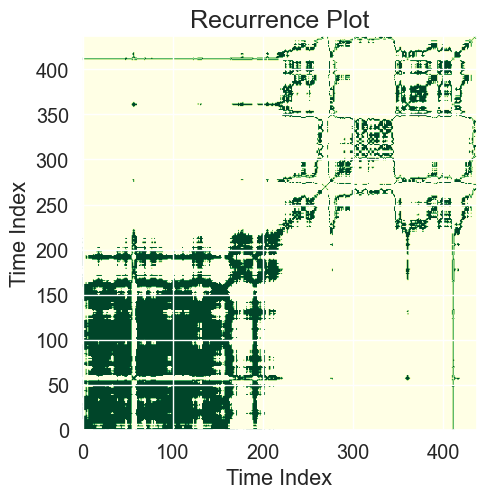

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
!pip install pyts 
from pyts.image import RecurrencePlot

# Load the GunPoint dataset
#data2=np.round(data)
X=data.T
# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)
# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_rp[0], cmap='YlGn', origin='lower')
plt.title('Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.xlabel( "Time Index")
# Set label for y-axis
plt.ylabel( "Time Index")
plt.savefig('Recurrence_plot1.png')
plt.show()


     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/332.3 kB ? eta -:--:--
     ---------- ---------------------------- 92.2/332.3 kB 1.1 MB/s eta 0:00:01
     ------------------------------- ------ 276.5/332.3 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 332.3/332.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
   ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/24.5 MB 4.5 MB/s eta 0:00:06
   ---------------------------------------- 0.2/24.5 MB 3.5 MB/s eta 0:00:07
   ---------------------------------------- 0.2/24.5 MB 1.5 MB/s eta 0:00:17
    --------------------------------------- 0.3/24.5 MB 1.7 MB/s eta 0:00:15
    --------------------------------------- 0.5/24.5 MB 2.2 MB/s eta 0:00:12
    ------

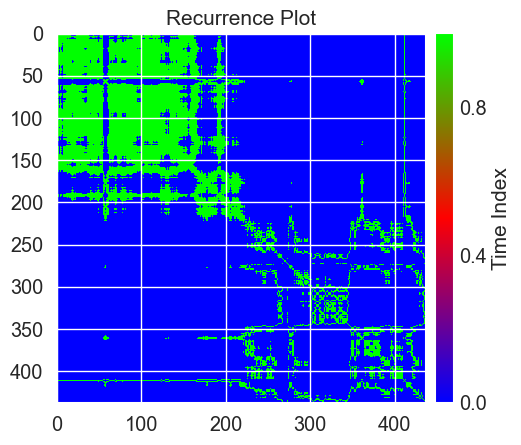

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot
!pip install -U seaborn-image
import seaborn_image as isns
# Load the GunPoint dataset
#data2=np.round(data)
X=data.T
# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)
# Show the results for the first time series
isns.imgplot(X_rp[0],cmap='brg',showticks=True,alpha=1).set(title='Recurrence Plot')
# Set label for x-axis
#plt.xlabel( "Time Index")
# Set label for y-axis
plt.ylabel( "Time Index")
plt.savefig('Recurrence_plot.png')

In [25]:
# GridSearch for optimization of Kernel Density Bandwidth
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
grid = GridSearchCV(KernelDensity(kernel="linear"),
                    {'bandwidth': np.linspace(0, 10, 50)},
                    cv=20) # 20-fold cross-validation
grid.fit(pd.DataFrame(data.iloc[350:438,2]))
print (grid.best_params_)

{'bandwidth': 7.142857142857143}


c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_p

C:\Users\ssais\AppData\Local\Temp\ipykernel_12212\556870604.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(X,label="Fitting Error Distribution", rug=True)
c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\ssais\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:465: Us

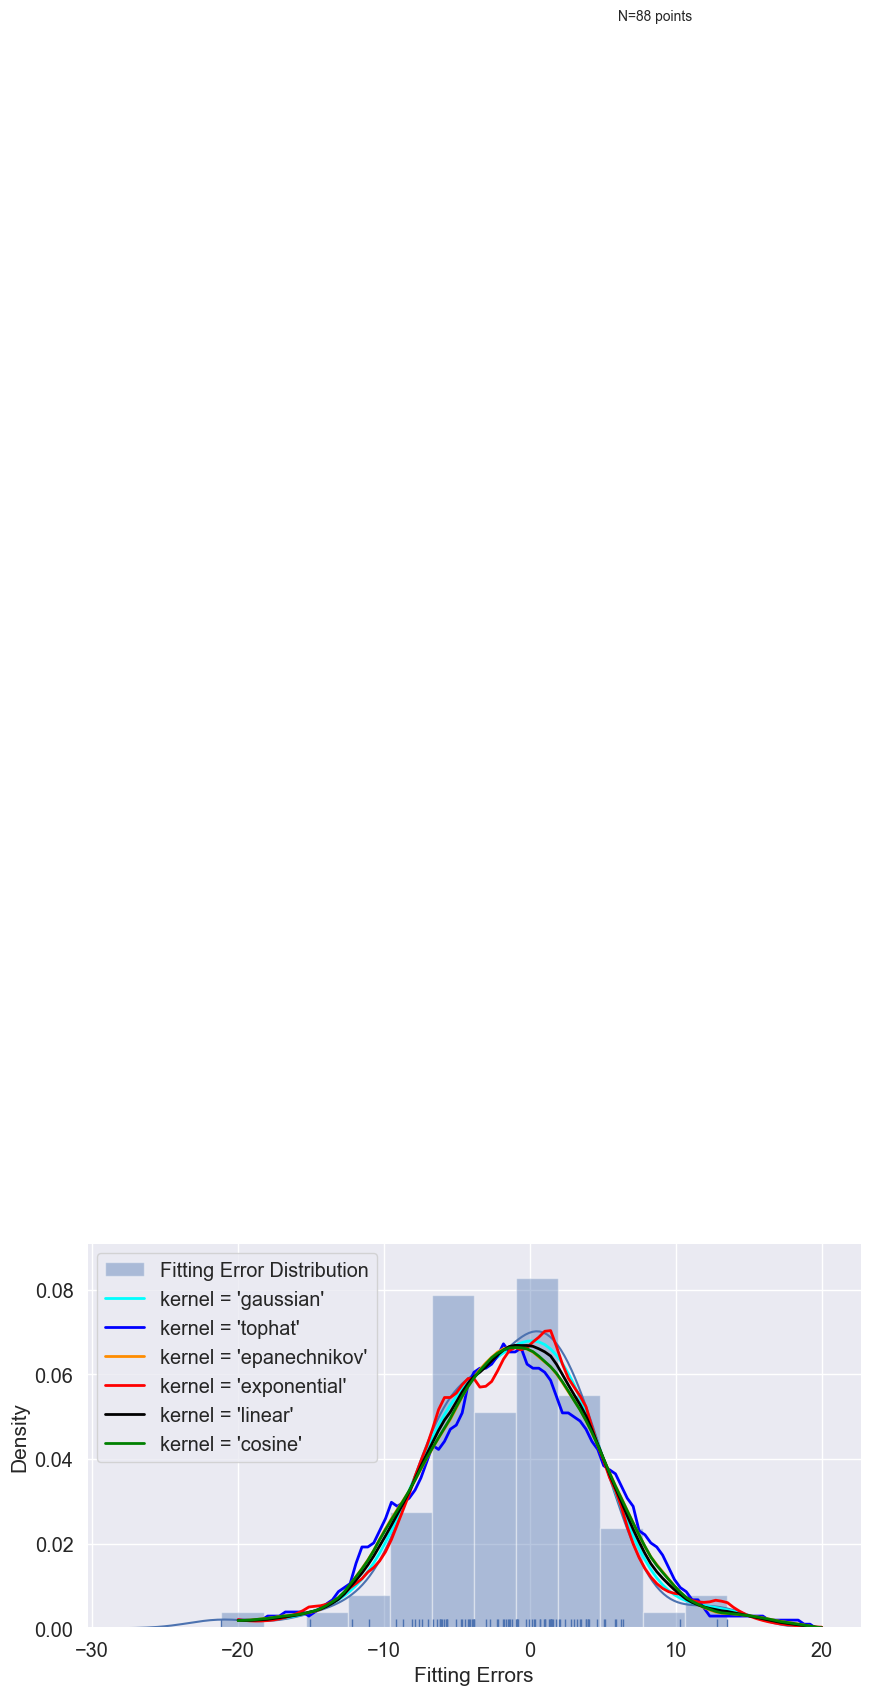

In [26]:
from sklearn.neighbors import KernelDensity
# Plot a 1D density example
N = 88
np.random.seed(1)
X=pd.DataFrame(data.iloc[350:438,2])
X_plot = np.linspace(-20, 20, 100)[:, np.newaxis]
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax=sns.distplot(X,label="Fitting Error Distribution", rug=True)
#ax.fill(X_plot[:, 0], true_dens, fc="green", alpha=0.2, label="Fitting Error Distribution")
#ax.plot.kde(X_plot.iloc[:, 0], label="input distribution")
colors = ["cyan", "blue", "darkorange","red","black","green"]
kernels = ["gaussian", "tophat", "epanechnikov","exponential","linear","cosine"]
Bwidth=[2.653,5.918,6.735,2.041,6.939,6.939]
lw = 2
ax.set(xlabel='Fitting Errors', ylabel='Density')
for color, kernel,Bwidth in zip(colors, kernels,Bwidth):
    kde = KernelDensity(kernel=kernel, bandwidth=Bwidth).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )


ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
#ax.plot(X.iloc[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

#ax.set_xlim(-10, 10)
#ax.set_ylim(0, 1)

plt.show()

C:\Users\ssais\AppData\Local\Temp\ipykernel_12212\768411162.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(X,label="Fitting Error Distribution", rug=True)


ValueError: DataFrame constructor not properly called!

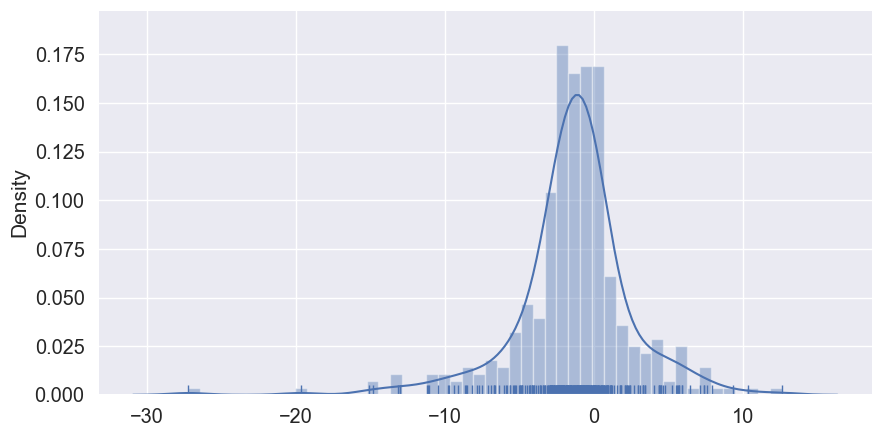

In [27]:
# Fitting Gaussian Distribution to Error
from scipy.stats import t
from scipy.stats import norm
import scipy.stats as st
N = 350
np.random.seed(1)
X=pd.DataFrame(data.iloc[1:350,2])
X_plot = np.linspace(-20, 20, 1000)[:, np.newaxis]
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
ax=sns.displot(X,label="Fitting Error Distribution", rug=True)
lw = 2
sampleMean = pd.DataFrame(np.mean(X))    #sample mean
sampleStandardError = st.sem(X)  #sample standard error
ax.set(xlabel='Fitting Errors', ylabel='Density')
ax.text(6, 0.38, "N={0} points".format(N))
#ax.plot(X_plot[:, 0], t.pdf(X_plot, N-1,sampleMean+2,5),'r-', lw=2, alpha=1, label='t Location Scale')
ax.plot(X_plot[:, 0], norm.pdf(X_plot, 0,3),'r-', lw=2, alpha=1, label='Gaussian')
ax.plot(X_plot[:, 0], t.pdf(X_plot, df=X.shape[0]-1,loc=0,scale=2),'g-', lw=2, alpha=1, label='t Location Scale')
ax.legend(loc="best")
plt.savefig('Distribution_Fitting_Predictive_Error.png')
plt.show()

In [52]:
def find_confidence_interval_gaussian(confidenceLevel,sampleMean,sampleStandardError,error,ForecastedData):
    degrees_freedom = len(error)-1  #degree of freedom = sample size-1
    #sampleMean = np.mean(error)    #sample mean
    #sampleStandardError = st.sem(error)  #sample standard error
    confidenceInterval95 = st.norm.interval(confidence=confidenceLevel, loc=sampleMean, scale=sampleStandardError)
    lower95=pd.DataFrame(ForecastedData+confidenceInterval95[0])
    upper95=pd.DataFrame(ForecastedData+confidenceInterval95[1])
    df = pd.concat([lower95, upper95], axis = 1)
    return df

In [55]:
def find_confidence_interval_t_location_scale(confidenceLevel,sampleMean,sampleStandardError,error,ForecastedData):
    degrees_freedom = len(error)-1  #degree of freedom = sample size-1
    #sampleMean = np.mean(error)    #sample mean
    #sampleStandardError = st.sem(error)  #sample standard error
    confidenceInterval95 = st.t.interval(confidence=confidenceLevel, df=error.shape[0]-1,loc=sampleMean, scale=sampleStandardError)
    lower95=pd.DataFrame(ForecastedData+confidenceInterval95[0])
    upper95=pd.DataFrame(ForecastedData+confidenceInterval95[1])
    df = pd.concat([lower95, upper95], axis = 1)
    return df

In [36]:
def find_Prediction_Interval_Evaluation(pi,Original,Forecasted,ci):
    # Computation of Prediction Interval Coverage Probability (PICP)
    count=0
    cc=pd.DataFrame()
    for i in range(0,Original.shape[0],1):
        dat=Original.iloc[i,0]
        if dat >= pi.iloc[i,0] and dat <= pi.iloc[i,1]:
            count+=1
    PICP=(1/Original.shape[0])*count*100
    
    # Computation of Prediction Interval Normalized Average Width (PINAW)
    sum=0
    for i in range(0,pi.shape[0],1):
        sum+=pi.iloc[i,1]-pi.iloc[i,0]
    A=np.max(Original)-np.min(Original)
    PINAW=(1/(A*pi.shape[0]))*sum 
    
    # Computation of Accumulated Width Deviation (AWD)
    sum=0
    for i in range(0,Original.shape[0],1):
        dat=Original.iloc[i,0]
        if dat >= pi.iloc[i,0] and dat <= pi.iloc[i,1]:
            sum+=0
        elif dat < pi.iloc[i,0]:
            sum+=(pi.iloc[i,0]-dat)/(pi.iloc[i,1]-pi.iloc[i,0])
        else:
            sum+=(dat-pi.iloc[i,1])/(pi.iloc[i,1]-pi.iloc[i,0])
    AWD=(1/Original.shape[0])*sum
    
    # Computation of Average Coverage Error (ACE)=PICP-PINC
    ACE=PICP-ci
    
    return PICP, PINAW, AWD,ACE

In [39]:
# Obtaining Confidence Interval using Gaussian-Distribution
#import modules
import numpy as np
import scipy.stats as st
#define given sample data
error = pd.DataFrame(data.iloc[350:438,2])
ForecastedData=pd.DataFrame(data.iloc[350:438,1])
Original=pd.DataFrame(data.iloc[350:438,0])
error

,Error
350,-3.965812
351,5.910625
352,1.016510
353,-2.716246
354,-11.065312
...,...
433,1.973606
434,12.815278
435,-12.200710
436,4.620152


In [43]:
ForecastedData

,Predicted
350,51.785812
351,48.539375
352,58.253490
353,62.536246
354,61.965312
...,...
433,89.666394
434,95.684722
435,113.980710
436,104.929848


,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,89.772727,0.167347,0.027544,-0.227273
2,82.954545,0.130385,0.055294,2.954545
3,68.181818,0.105446,0.100327,-1.818182
4,57.954545,0.085626,0.166227,-2.045455


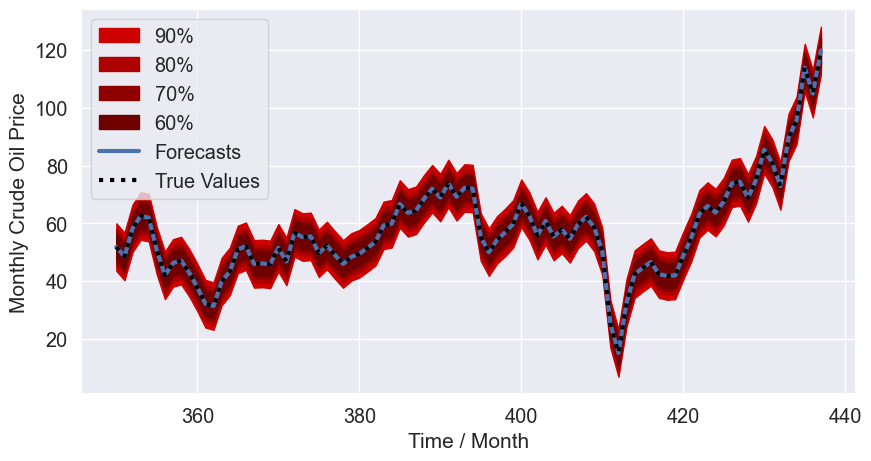

In [58]:
#Calculate different confidence intervals with Gaussian Distribution
location=0
Scale=5
conf95=find_confidence_interval_gaussian(0.95,location,Scale,error,ForecastedData)
conf90=find_confidence_interval_gaussian(0.90,location,Scale,error,ForecastedData)
conf80=find_confidence_interval_gaussian(0.80,location,Scale,error,ForecastedData)
conf70=find_confidence_interval_gaussian(0.70,location,Scale,error,ForecastedData)
conf60=find_confidence_interval_gaussian(0.60,location,Scale,error,ForecastedData)
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
#ax.fill_between(conf95.index,conf95.iloc[:,0],conf95.iloc[:,1], color='#ff0000',label='95%')
ax.fill_between(conf90.index,conf90.iloc[:,0],conf90.iloc[:,1], color='#cf0000',label='90%')
ax.fill_between(conf80.index,conf80.iloc[:,0],conf80.iloc[:,1], color='#af0000',label='80%')
ax.fill_between(conf90.index,conf70.iloc[:,0],conf70.iloc[:,1], color='#8f0000',label='70%')
ax.fill_between(conf80.index,conf60.iloc[:,0],conf60.iloc[:,1], color='#6f0000',label='60%')
ax.plot(ForecastedData, linewidth=3,label='Forecasts')
ax.plot(ForecastedData, linewidth=3,label='True Values',color='black', ls=':')
ax.legend(loc="best")
ax.set(xlabel='Time / Month', ylabel='Monthly Crude Oil Price')
PIEvaluation=pd.DataFrame(np.zeros((5,4)))
#PIEvaluation.iloc[0,0], PIEvaluation.iloc[0,1], PIEvaluation.iloc[0,2], PIEvaluation.iloc[0,3]=find_Prediction_Interval_Evaluation(conf95,Original,ForecastedData,95)
PIEvaluation.iloc[1,0], PIEvaluation.iloc[1,1], PIEvaluation.iloc[1,2], PIEvaluation.iloc[1,3]=find_Prediction_Interval_Evaluation(conf90,Original,ForecastedData,90)
PIEvaluation.iloc[2,0], PIEvaluation.iloc[2,1], PIEvaluation.iloc[2,2], PIEvaluation.iloc[2,3]=find_Prediction_Interval_Evaluation(conf80,Original,ForecastedData,80)
PIEvaluation.iloc[3,0], PIEvaluation.iloc[3,1], PIEvaluation.iloc[3,2], PIEvaluation.iloc[3,3]=find_Prediction_Interval_Evaluation(conf70,Original,ForecastedData,70)
PIEvaluation.iloc[4,0], PIEvaluation.iloc[4,1], PIEvaluation.iloc[4,2], PIEvaluation.iloc[4,3]=find_Prediction_Interval_Evaluation(conf60,Original,ForecastedData,60)
plt.savefig('Gaussian_Distribution_Prediction_Interval.png')
PIEvaluation

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,89.772727,0.169148,0.026706,-0.227273
2,82.954545,0.131382,0.054227,2.954545
3,68.181818,0.106079,0.098781,-1.818182
4,59.090909,0.086049,0.164404,-0.909091


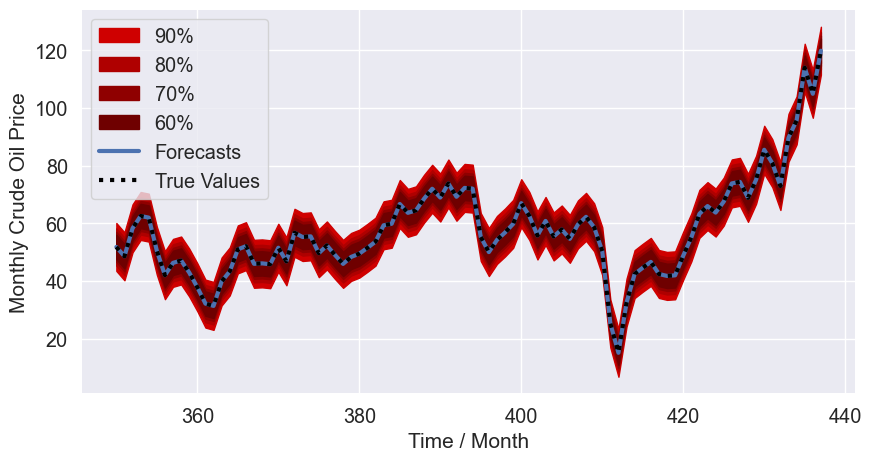

In [56]:
#Calculate different confidence intervals with Gaussian Distribution
location=0
Scale=5
#conf95=find_confidence_interval_t_location_scale(0.95,location,Scale,error,ForecastedData)
conf90=find_confidence_interval_t_location_scale(0.90,location,Scale,error,ForecastedData)
conf80=find_confidence_interval_t_location_scale(0.80,location,Scale,error,ForecastedData)
conf70=find_confidence_interval_t_location_scale(0.70,location,Scale,error,ForecastedData)
conf60=find_confidence_interval_t_location_scale(0.60,location,Scale,error,ForecastedData)
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
#ax.fill_between(conf95.index,conf95.iloc[:,0],conf95.iloc[:,1], color='#ff0000',label='95%')
ax.fill_between(conf90.index,conf90.iloc[:,0],conf90.iloc[:,1], color='#cf0000',label='90%')
ax.fill_between(conf80.index,conf80.iloc[:,0],conf80.iloc[:,1], color='#af0000',label='80%')
ax.fill_between(conf90.index,conf70.iloc[:,0],conf70.iloc[:,1], color='#8f0000',label='70%')
ax.fill_between(conf80.index,conf60.iloc[:,0],conf60.iloc[:,1], color='#6f0000',label='60%')
ax.plot(ForecastedData, linewidth=3,label='Forecasts')
ax.plot(ForecastedData, linewidth=3,label='True Values',color='black', ls=':')
ax.legend(loc="best")
ax.set(xlabel='Time / Month', ylabel='Monthly Crude Oil Price')
PIEvaluation=pd.DataFrame(np.zeros((5,4)))
#PIEvaluation.iloc[0,0], PIEvaluation.iloc[0,1], PIEvaluation.iloc[0,2], PIEvaluation.iloc[0,3]=find_Prediction_Interval_Evaluation(conf95,Original,ForecastedData,95)
PIEvaluation.iloc[1,0], PIEvaluation.iloc[1,1], PIEvaluation.iloc[1,2], PIEvaluation.iloc[1,3]=find_Prediction_Interval_Evaluation(conf90,Original,ForecastedData,90)
PIEvaluation.iloc[2,0], PIEvaluation.iloc[2,1], PIEvaluation.iloc[2,2], PIEvaluation.iloc[2,3]=find_Prediction_Interval_Evaluation(conf80,Original,ForecastedData,80)
PIEvaluation.iloc[3,0], PIEvaluation.iloc[3,1], PIEvaluation.iloc[3,2], PIEvaluation.iloc[3,3]=find_Prediction_Interval_Evaluation(conf70,Original,ForecastedData,70)
PIEvaluation.iloc[4,0], PIEvaluation.iloc[4,1], PIEvaluation.iloc[4,2], PIEvaluation.iloc[4,3]=find_Prediction_Interval_Evaluation(conf60,Original,ForecastedData,60)
plt.savefig('t_Location_Scale_Distribution_Prediction_Interval.png')
PIEvaluation